In [38]:
import numpy as np
import pandas as pd 
customer_data = pd.read_excel(r'dataset.xlsx')

In [2]:
customer_data.shape

(1000, 5)

In [3]:
customer_data.columns

Index(['Customer ID', 'Gender', 'Age', 'Total Earning', 'Spending Score'], dtype='object')

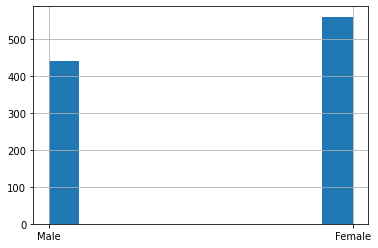

In [45]:
customer_data['Gender'].hist();

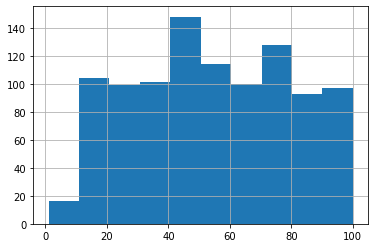

In [4]:
customer_data['Spending Score'].hist();

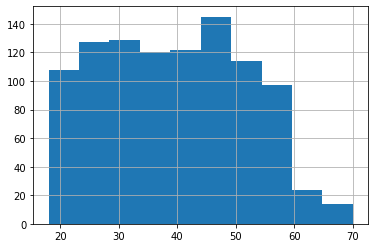

In [46]:
customer_data['Age'].hist();

In [5]:
customer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,39.543,12.178196,18.0,29.00,39.0,49.00,70.0
Total Earning,1000.0,79.793,38.097212,15.0,48.00,77.0,112.00,150.0
Spending Score,1000.0,54.336,25.528941,1.0,34.00,54.0,75.00,100.0


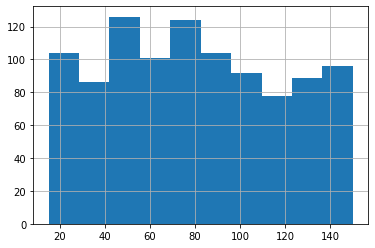

In [6]:
customer_data['Total Earning'].hist()

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   int64 
 1   Gender          1000 non-null   object
 2   Age             1000 non-null   int64 
 3   Total Earning   1000 non-null   int64 
 4   Spending Score  1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [8]:
customer_data.head() 

,Customer ID,Gender,Age,Total Earning,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
customer_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
customer_data['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Encoding Variables and Feature Engineering

In [9]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = customer_data['Age']
customer_data['Age Groups'] = pd.cut(x=col, bins=intervals)

# To be able to look at the result stored in the variable
customer_data['Age Groups']

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
995    (20, 30]
996    (20, 30]
997    (20, 30]
998    (50, 60]
999    (50, 60]
Name: Age Groups, Length: 1000, dtype: category
Categories (6, interval[int64]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [10]:
customer_data.groupby('Age Groups')['Age Groups'].count()

Age Groups
(15, 20]     29
(20, 30]    260
(30, 40]    245
(40, 50]    244
(50, 60]    205
(60, 70]     17
Name: Age Groups, dtype: int64

In [11]:
# The _oh means one hot
customer_data_oh = pd.get_dummies(customer_data)
# Display the one hot encoded dataframe
customer_data_oh 

,Customer ID,Age,Total Earning,Spending Score,Gender_Female,Gender_Male,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,0,1,1,0,0,0,0,0
1,2,21,15,81,0,1,0,1,0,0,0,0
2,3,20,16,6,1,0,1,0,0,0,0,0
3,4,23,16,77,1,0,0,1,0,0,0,0
4,5,31,17,40,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,84,56,1,0,0,1,0,0,0,0
996,997,22,65,42,1,0,0,1,0,0,0,0
997,998,23,115,19,0,1,0,1,0,0,0,0
998,999,52,86,24,0,1,0,0,0,0,1,0


Basic Plotting and Dimensionality Reduction

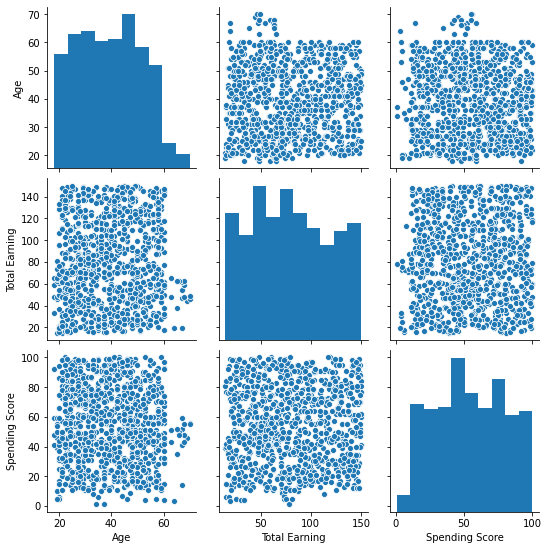

In [13]:
import seaborn as sns

# Dropping CustomerID column from data 
customer_data = customer_data.drop('Customer ID', axis=1)

sns.pairplot(customer_data)

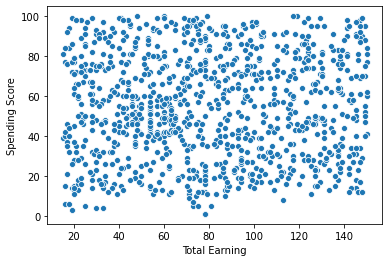

In [14]:
sns.scatterplot(x=customer_data['Total Earning'], y=customer_data['Spending Score']);

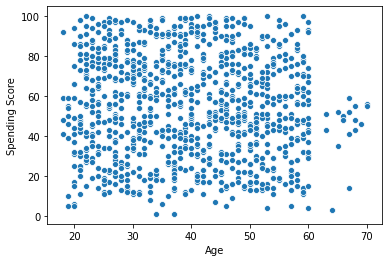

In [48]:
sns.scatterplot(x=customer_data['Age'], y=customer_data['Spending Score']);

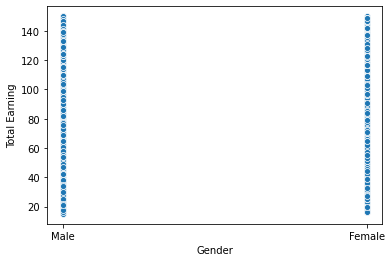

In [50]:
sns.scatterplot(x=customer_data['Gender'], y=customer_data['Total Earning']);

# Implementing an Agglomerative Hierarchical Clustering

using original data

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [21.25, 21.25, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [45.625, 45.625, 111.25, 111.25],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [152.5, 152.5, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [167.5, 167.5, 221.25, 221.25],
  [78.4375, 78.4375, 194.375, 194.375],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [290.0, 290.0, 312.5, 312.5],
  [262.5, 262.5, 301.25, 301.25],
  [345.0, 345.0,

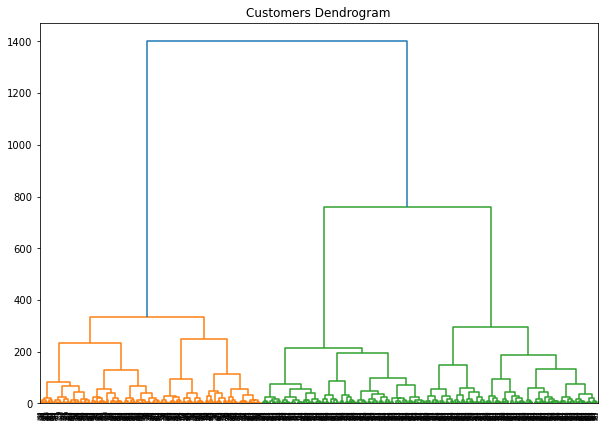

In [15]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)

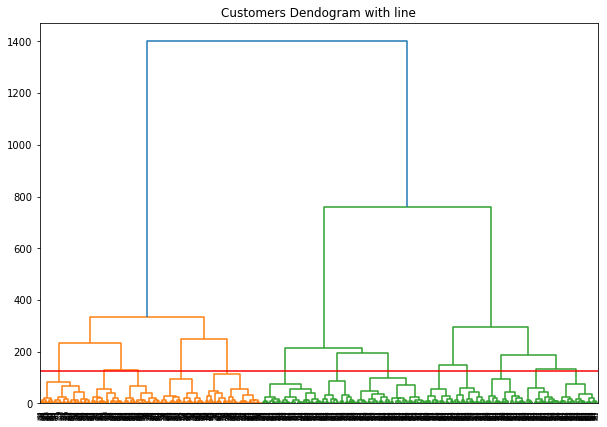

In [16]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')

In [17]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3,
       3, 3, 4, 2, 4, 1, 1, 2, 0, 3, 3, 0, 1, 4, 3, 3, 1, 2, 2, 4, 4, 4,
       4, 2, 2, 1, 1, 3, 0, 2, 3, 0, 1, 0, 3, 2, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 3, 1, 2, 2, 1, 2, 2, 1, 3, 3, 3, 2, 0, 4, 1, 3, 4, 2, 1, 1,
       1, 3, 3, 4, 4, 0, 2, 3, 2, 3, 1, 0, 2, 1, 4, 2, 2, 3, 3, 3, 0, 2,
       4, 1, 1, 0, 2, 3, 4, 0, 0, 3, 3, 4, 0, 1, 3,

Text(0.5, 1.0, 'Labeled Customer Data')

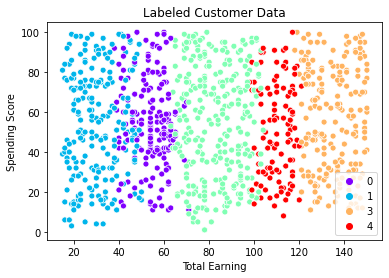

In [24]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Total Earning', 
                y=customer_data['Spending Score'], 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')

Text(0.5, 1.0, 'Labeled Customer Data')

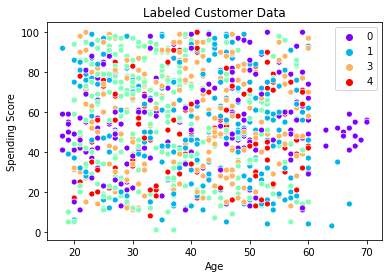

In [51]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Age', 
                y=customer_data['Spending Score'], 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')

Text(0.5, 1.0, 'Labeled Customer Data')

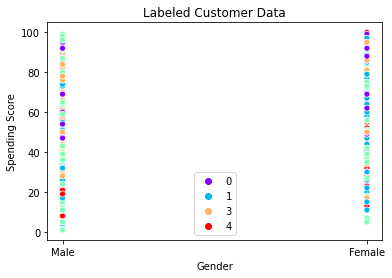

In [53]:
data_labels = clustering_model.labels_
sns.scatterplot(x=customer_data['Gender'], 
                y=customer_data['Spending Score'], 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')

In [39]:
x= customer_data.iloc[:,3:5]

x_array =  np.array(x)
print(x_array)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 ...
 [115  19]
 [ 86  24]
 [124  28]]


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[-1.70157914, -0.60103056],
       [-1.70157914,  1.04498428],
       [-1.67531736, -1.89432793],
       ...,
       [ 0.92459829, -1.38484715],
       [ 0.16300683, -1.188893  ],
       [ 1.16095425, -1.03212969]])

In [43]:
# Fitting the model for values in range(1,11)
from sklearn.cluster import KMeans
SSD =[]
K = range(1,11)

for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(x_scaled)
    SSD.append(km.inertia_)

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score
KMean= KMeans(n_clusters=5)
KMean.fit(x_scaled)
label=KMean.predict(x_scaled)

print("Silhouette Score(n=5):",silhouette_score(x_scaled, label))

Silhouette Score(n=5): 0.38174058820522894
